In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read data to create dataframe
traffic_data = pd.read_csv('235-Nov.csv')

In [ ]:
# Inspect dataframe
print(traffic_data.head())

  owner-id network-id      date   time  utc-offset  start-ime  end-time  \
0   Q-Free     Q-Free  20211110  80900           0      80800     80900   
1   Q-Free     Q-Free  20211110  80900           0      80800     80900   
2   Q-Free     Q-Free  20211110  80900           0      80800     80900   
3   Q-Free     Q-Free  20211110  80900           0      80800     80900   
4   Q-Free     Q-Free  20211110  80900           0      80800     80900   

     detector-id status  lane-id  ...  small-class-count  medium-class-count  \
0   DMDS20-WB EN     OK        1  ...                  0                   0   
1   DMDS20-WB RL     OK        4  ...                  0                   1   
2  DMDS20-WB RCL     OK        3  ...                  0                   0   
3  DMDS20-WB LCL     OK        2  ...                  0                   0   
4   DMDS20-WB LL     OK        1  ...                  0                   0   

   large-class-count                device-id  link-direction  detec

In [ ]:
print(traffic_data.describe())

               date           time  utc-offset      start-ime       end-time  \
count  1.287800e+05  128780.000000    128780.0  128780.000000  128780.000000   
mean   2.021111e+07  117912.004193         0.0  117932.395558  117912.004193   
std    3.440028e+00   69021.866649         0.0   69021.150108   69021.866649   
min    2.021110e+07       0.000000         0.0       0.000000       0.000000   
25%    2.021110e+07   60100.000000         0.0   60100.000000   60100.000000   
50%    2.021111e+07  120000.000000         0.0  120000.000000  120000.000000   
75%    2.021111e+07  175700.000000         0.0  175800.000000  175700.000000   
max    2.021111e+07  235900.000000         0.0  235900.000000  235900.000000   

             lane-id     lane-count  lane-occupancy     lane-speed  \
count  128780.000000  128780.000000   128780.000000  128780.000000   
mean        2.200000       9.634074        3.797197      61.164964   
std         1.166195       8.714397        4.332574       6.787330   

In [ ]:
print(traffic_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128780 entries, 0 to 128779
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   owner-id            128780 non-null  object
 1   network-id          128780 non-null  object
 2   date                128780 non-null  int64 
 3   time                128780 non-null  int64 
 4   utc-offset          128780 non-null  int64 
 5   start-ime           128780 non-null  int64 
 6   end-time            128780 non-null  int64 
 7   detector-id         128780 non-null  object
 8   status              128780 non-null  object
 9   lane-id             128780 non-null  int64 
 10  lane-count          128780 non-null  int64 
 11  lane-occupancy      128780 non-null  int64 
 12  lane-speed          128780 non-null  int64 
 13  small-class-count   128780 non-null  int64 
 14  medium-class-count  128780 non-null  int64 
 15  large-class-count   128780 non-null  int64 
 16  de

In [ ]:
# Function to convert HHMMSS int to hours
def convert_to_hours(hhmmss):
    # Convert to string and pad with zeros if necessary
    hhmmss_str = str(hhmmss).zfill(6)

    # Now parse the hours, minutes, and seconds
    hh = int(hhmmss_str[:2])
    mm = int(hhmmss_str[2:4])
    ss = int(hhmmss_str[4:6])

    # Calculate total seconds and convert to hours
    total_seconds = hh * 3600 + mm * 60 + ss
    return total_seconds / 3600  # Convert seconds to hours

# Apply the function to the 'time' column
traffic_data['hours'] = traffic_data['time'].apply(convert_to_hours)

# Display the DataFrame with the new 'hours' column
print(traffic_data)


       owner-id network-id      date   time  utc-offset  start-ime  end-time  \
0        Q-Free     Q-Free  20211110  80900           0      80800     80900   
1        Q-Free     Q-Free  20211110  80900           0      80800     80900   
2        Q-Free     Q-Free  20211110  80900           0      80800     80900   
3        Q-Free     Q-Free  20211110  80900           0      80800     80900   
4        Q-Free     Q-Free  20211110  80900           0      80800     80900   
...         ...        ...       ...    ...         ...        ...       ...   
128775   Q-Free     Q-Free  20211109  50500           0      50400     50500   
128776   Q-Free     Q-Free  20211109  50500           0      50400     50500   
128777   Q-Free     Q-Free  20211109  50500           0      50400     50500   
128778   Q-Free     Q-Free  20211109  50500           0      50400     50500   
128779   Q-Free     Q-Free  20211109  50500           0      50400     50500   

          detector-id status  lane-id  

In [ ]:
# Inspect hours column
traffic_data[['hours']].head()

,hours
0,8.15
1,8.15
2,8.15
3,8.15
4,8.15


In [ ]:
# Convert date to datetime format
traffic_data['date'] = pd.to_datetime(traffic_data['date'], format='%Y%m%d')

In [ ]:
# Inspect date column
traffic_data[['date']].head()

,date
0,2021-11-10
1,2021-11-10
2,2021-11-10
3,2021-11-10
4,2021-11-10


In [ ]:
# Get unique dates
unique_dates = traffic_data['date'].unique()

# Loop through each unique date
for date in unique_dates:
    # Filter the DataFrame for the current date
    date_data = traffic_data[traffic_data['date'] == date]

    # Calculate the average lane occupancy
    avg_lane_occupancy = date_data['lane-occupancy'].mean()

    # Print the result
    print(f"Date: {date.date()}, Average Lane Occupancy: {avg_lane_occupancy:.2f}")

Date: 2021-11-10, Average Lane Occupancy: 4.48
Date: 2021-11-02, Average Lane Occupancy: 4.23
Date: 2021-11-08, Average Lane Occupancy: 4.29
Date: 2021-11-11, Average Lane Occupancy: 2.36
Date: 2021-11-03, Average Lane Occupancy: 1.81
Date: 2021-11-09, Average Lane Occupancy: 1.97


In [ ]:
status = traffic_data['status'].value_counts()
print(status)

status
OK                128777
SENSOR_FAILURE         3
Name: count, dtype: int64


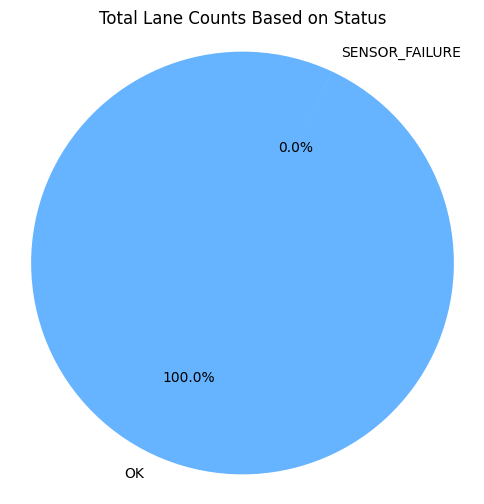

In [ ]:
# Create a pie chart for status counts
plt.figure(figsize=(6, 6))
plt.pie(status, labels=status.index, autopct='%1.1f%%', startangle=65, colors=['#66b3ff','#99ff99','#ffcc99'])
plt.title('Total Lane Counts Based on Status')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

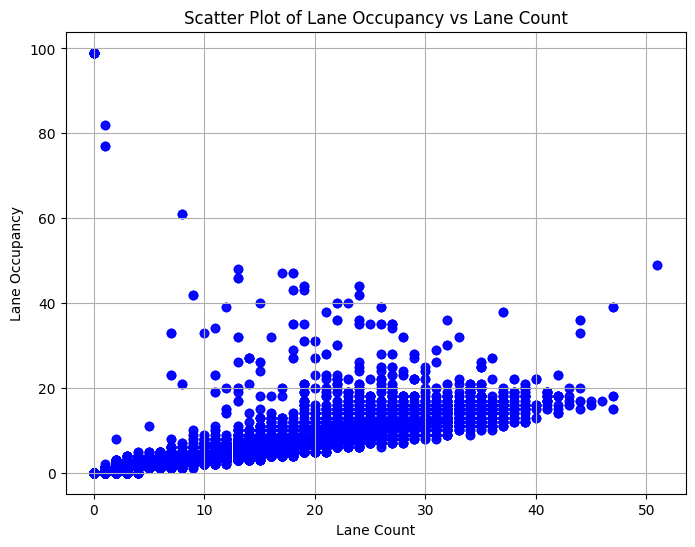

In [ ]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(traffic_data['lane-count'], traffic_data['lane-occupancy'], color='blue', alpha=0.6)

# Add labels and title
plt.xlabel('Lane Count')
plt.ylabel('Lane Occupancy')
plt.title('Scatter Plot of Lane Occupancy vs Lane Count')
plt.grid(True)

plt.show()